In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./iris.data',header=0,names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
X=df.drop('class',1).to_numpy()
Y=df['class'].to_numpy()

In [5]:
print(X[0])
print(Y[0])

[4.9 3.  1.4 0.2]
Iris-setosa


In [6]:
from sklearn.model_selection import train_test_split

#Splitting dataset in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=66)

In [7]:
#method to generate mapping of the labels to the categories
#It maps the particular cluster label to the category with maximum frequency in that cluster.
def generate_mapping(labels, actual_labels, noc):
    mp={}
    
    for n in range(0,noc):
        cnt={}
        for i in range(0,len(labels)):
            if labels[i]==n:
                cnt[actual_labels[i]]=cnt.get(actual_labels[i],0)+1
                
        max_key=max(cnt, key=cnt.get)
        
        mp[n]=max_key
    
    return mp

#method to map labels based on pre-generated mapping
def map_labels(labels, mapping):
    mapped_labels=[]
    
    for l in labels:
        mapped_labels.append(mapping[l])
        
    return mapped_labels
    

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

K=10

iner={}
labels={}
models={}
mappings={}

#iterating over different values of K
for k in range(1,K):
    
    #applying K-means clustering
    kmeans=KMeans(n_clusters=k).fit(X_train)
    
    #getting train labels
    labels[k]=kmeans.labels_
    
    #generating mapping
    mapping=generate_mapping(labels[k],Y_train,k)
    
    #mapping training labels
    mapped_labels=map_labels(labels[k],mapping)
    
    #calculating training accuracy
    acc=accuracy_score(Y_train, mapped_labels)
    
    
    
    #evaluating test data
    Y_pred=kmeans.predict(np.array(X_test))
    
    #mapped test preds
    mapped_preds=map_labels(Y_pred,mapping)
    
    #calculating validation accuracy
    val_acc=accuracy_score(Y_test, mapped_preds)
    
    
    
    print(f"k={k} Training Accuracy: {acc}\t Validation Accuracy: {val_acc}")
    
    iner[k]=kmeans.inertia_
    
    models[k]=kmeans
    
    mappings[k]=mapping
    

k=1 Training Accuracy: 0.34615384615384615	 Validation Accuracy: 0.3111111111111111
k=2 Training Accuracy: 0.6826923076923077	 Validation Accuracy: 0.6222222222222222
k=3 Training Accuracy: 0.8942307692307693	 Validation Accuracy: 0.8888888888888888
k=4 Training Accuracy: 0.8653846153846154	 Validation Accuracy: 0.8666666666666667
k=5 Training Accuracy: 0.9038461538461539	 Validation Accuracy: 0.8888888888888888
k=6 Training Accuracy: 0.9038461538461539	 Validation Accuracy: 0.8888888888888888
k=7 Training Accuracy: 0.9519230769230769	 Validation Accuracy: 1.0
k=8 Training Accuracy: 0.9615384615384616	 Validation Accuracy: 1.0
k=9 Training Accuracy: 0.9423076923076923	 Validation Accuracy: 1.0


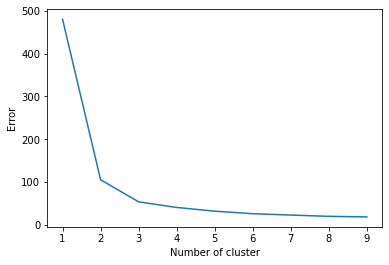

In [11]:
#Applying Eblow Method to find optimal K

plt.figure()
plt.plot(list(iner.keys()), list(iner.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Error")
plt.show()

### We can clearly see from the above chart that optimal number of clusters will be 3. 

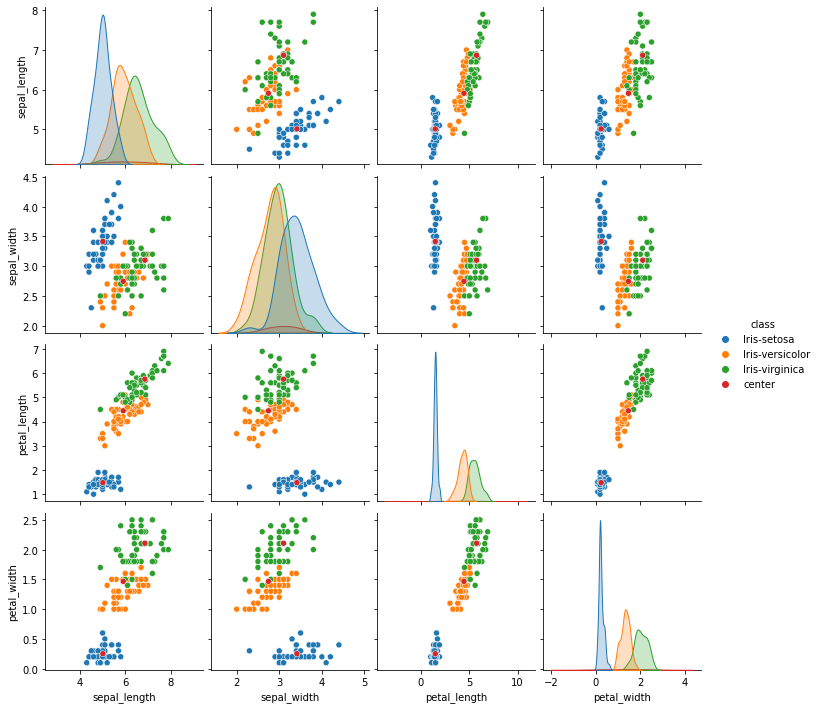

In [10]:
#scatter plot
import seaborn as sns


df_=df

#evaluating whole data
pred=models[3].predict(np.array(X))

#mapping prediction
pred=map_labels(pred,mappings[3])

#creating center dataframe
centers=models[3].cluster_centers_
df_centers=pd.DataFrame(centers,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_centers['class']='center'

df_centers.head()

#Appending center dataframe
df_=df_.append(df_centers,ignore_index=True)        

sns.pairplot(df_,hue='class')

#### 1. In the above plot, red dots represent the cluster centers
#### 2. Clusters are well separated, which means clustering was successfull.